In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
data = pd.read_csv('titanic.csv')

In [26]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [27]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
data_1 =  data.drop(['PassengerId' ,'Name' , 'Ticket', 'Fare' , 'Embarked'], axis = 1 )

In [29]:
data_1.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,204
unique,NaN,NaN,2,NaN,NaN,NaN,147
top,NaN,NaN,male,NaN,NaN,NaN,B96 B98
freq,NaN,NaN,577,NaN,NaN,NaN,4
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,NaN


In [30]:
#as we can see, the cabin has only 204 in comparison to the rest, so i will make 2 data frames, one with the column of cabin fully
#removed, and the other with it present but with no null values in it.

In [31]:
data_3 = data_1.dropna(how='any',axis=0)

In [32]:
data_3.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
count,185.000000,185.000000,185,185.000000,185.000000,185.000000,185
unique,NaN,NaN,2,NaN,NaN,NaN,134
top,NaN,NaN,male,NaN,NaN,NaN,G6
freq,NaN,NaN,95,NaN,NaN,NaN,4
mean,0.675676,1.189189,NaN,35.829297,0.459459,0.470270,NaN
std,0.469392,0.512763,NaN,15.679356,0.642456,0.752122,NaN
min,0.000000,1.000000,NaN,0.920000,0.000000,0.000000,NaN
25%,0.000000,1.000000,NaN,24.000000,0.000000,0.000000,NaN
50%,1.000000,1.000000,NaN,36.000000,0.000000,0.000000,NaN
75%,1.000000,1.000000,NaN,48.000000,1.000000,1.000000,NaN


In [33]:
# we will save data 3 for later and work with data 2 now


In [34]:
data_2 =  data_1.drop(['Cabin'], axis = 1 )

In [35]:
data_2 = pd.get_dummies(data_2, drop_first = True)

In [36]:
data_2.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Sex_male      0
dtype: int64

#we will replace null with mean values


In [37]:
data_2['Age'].fillna(data_2['Age'].mean(),inplace=True)

In [38]:
data_2.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Sex_male    0
dtype: int64

In [39]:
data_2.describe(include = 'all')

,Survived,Pclass,Age,SibSp,Parch,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,0.647587
std,0.486592,0.836071,13.002015,1.102743,0.806057,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,1.000000


In [40]:
data_2.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [41]:
data_2.rename(columns={'Sex_male': 'Gender'}, inplace=True)

In [42]:
data_2.head()

,Survived,Pclass,Age,SibSp,Parch,Gender
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


#note: 1 = male while 2 = female


now, we'll start visualizing the data to analyze it

In [43]:
gender_counts = data_2['Gender'].value_counts()

In [44]:
gender_counts

1    577
0    314
Name: Gender, dtype: int64

we will pie plot the genders of all 

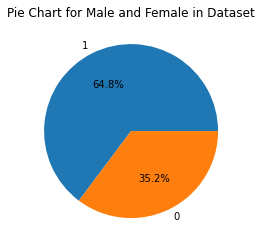

In [45]:
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart for Male and Female in Dataset')
plt.show()

now, we will start spliting the Dependent and Independent variables to start that model

In [46]:
survive_counts = data_2['Survived'].value_counts()

In [47]:
gender_counts

1    577
0    314
Name: Gender, dtype: int64

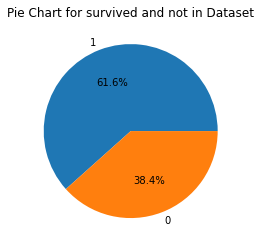

In [48]:
plt.pie(survive_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart for survived and not in Dataset')
plt.show()

In [49]:
y = data_2['Survived']
x = data_2[['Pclass','Age','SibSp','Parch','Gender']]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=300)

In [51]:
lr=LogisticRegression()

In [52]:
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
predict=lr.predict(x_test)

#print confusion matrix 

In [54]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])


,Predicted No,Predicted Yes
Actual No,93,21
Actual Yes,18,47


#import classification report

In [55]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       114
           1       0.69      0.72      0.71        65

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



lets predict a value 

In [56]:
x_new = pd.DataFrame({'Pclass' :[2] , 'Age' :[30.0], 'SibSp':[1], 'Parch':[0], 'Gender':[1] })

In [57]:
data_2.head()

,Survived,Pclass,Age,SibSp,Parch,Gender
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [58]:
y_pred = lr.predict(x_new)

In [59]:
print(y_pred)

[0]


# the model predicts that this guy is not a survivor